In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist


/Users/mehmettirpan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


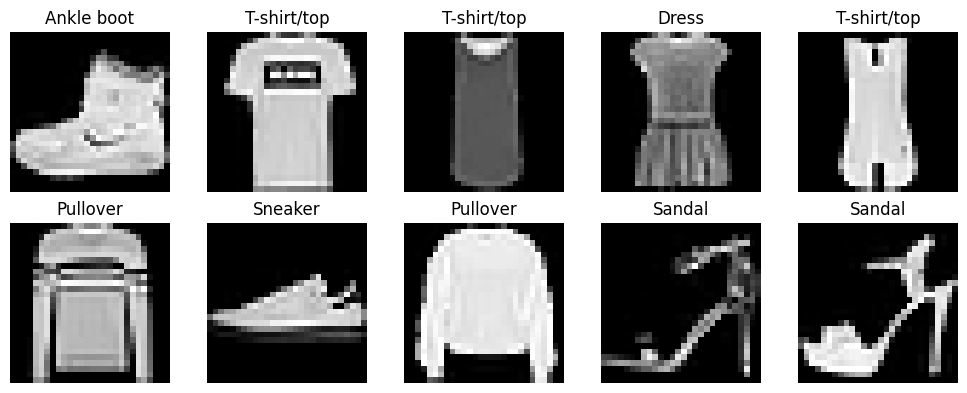

In [2]:
# Veriyi yükle
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizasyon
x_train = x_train / 255.0
x_test = x_test / 255.0

# Girişleri CNN'e uygun hale getirelim (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Sınıf isimleri
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# İlk görselleri gösterelim
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/mehmettirpan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_split=0.1, batch_size=64)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7107 - loss: 0.7770 - val_accuracy: 0.8663 - val_loss: 0.3798
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8649 - loss: 0.3745 - val_accuracy: 0.8710 - val_loss: 0.3567
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8818 - loss: 0.3266 - val_accuracy: 0.8920 - val_loss: 0.3065
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8964 - loss: 0.2834 - val_accuracy: 0.8900 - val_loss: 0.2968
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9046 - loss: 0.2614 - val_accuracy: 0.9075 - val_loss: 0.2628
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9133 - loss: 0.2395 - val_accuracy: 0.9033 - val_loss: 0.2623
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9211 - loss: 0.2160 - val_accuracy: 0.9093 - val_loss: 0.2475
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9271 - loss: 0.1992 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9010 - loss: 0.2892
Test accuracy: 0.9014


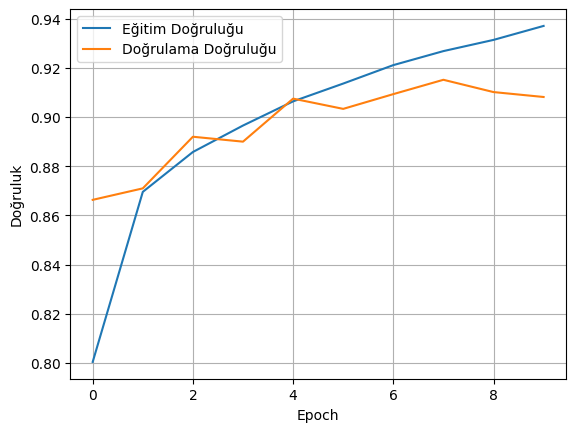

In [5]:
# Test verisiyle doğruluk
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Eğitim grafikleri
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()


# More Deep CNN arch

In [6]:
deep_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

deep_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 329,962 (1.26 MB)

 Trainable params: 329,962 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history_deep = deep_model.fit(x_train, y_train, epochs=10, 
                              validation_split=0.1, batch_size=64)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.6700 - loss: 0.8794 - val_accuracy: 0.8528 - val_loss: 0.3944
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8455 - loss: 0.4197 - val_accuracy: 0.8875 - val_loss: 0.3100
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.8780 - loss: 0.3387 - val_accuracy: 0.8932 - val_loss: 0.2791
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.8886 - loss: 0.3037 - val_accuracy: 0.9020 - val_loss: 0.2579
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8978 - loss: 0.2830 - val_accuracy: 0.9063 - val_loss: 0.2442
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.9031 - loss: 0.2648 - val_accuracy: 0.9043 - val_loss: 0.2531
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9082 - loss: 0.2500 - val_accuracy: 0.9150 - val_loss: 0.2228
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9145 - loss: 0.2362 - 

# Transfer Learning

In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görüntüleri yeniden boyutlandır (28x28 → 96x96) ve 3 kanallı yap
x_train_rgb = tf.image.grayscale_to_rgb(tf.image.resize(x_train, [96,96]))
x_test_rgb = tf.image.grayscale_to_rgb(tf.image.resize(x_test, [96,96]))

base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze weights

model_transfer = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_transfer.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

model_transfer.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
history_transfer = model_transfer.fit(x_train_rgb, y_train, epochs=10, 
                                      validation_split=0.1, batch_size=64)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 104ms/step - accuracy: 0.8298 - loss: 0.4811 - val_accuracy: 0.8928 - val_loss: 0.2895
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.8982 - loss: 0.2768 - val_accuracy: 0.8917 - val_loss: 0.2852
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 102ms/step - accuracy: 0.9124 - loss: 0.2360 - val_accuracy: 0.8842 - val_loss: 0.3140
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.9201 - loss: 0.2173 - val_accuracy: 0.8993 - val_loss: 0.2666
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 103ms/step - accuracy: 0.9296 - loss: 0.1889 - val_accuracy: 0.9025 - val_loss: 0.2674
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 88s 104ms/step - accuracy: 0.9339 - loss: 0.1739 - val_accuracy: 0.8982 - val_loss: 0.2842
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 103ms/step - accuracy: 0.9399 - loss: 0.1577 - val_accuracy: 0.9017 - val_loss: 0.2733
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 87s 103ms/step - accuracy: 0.9451 - loss: 0

In [10]:
import time
from tensorflow.keras.utils import plot_model
import pandas as pd

# Temel model değerlendirme
start_time = time.time()
test_loss_base, test_acc_base = model.evaluate(x_test, y_test, verbose=0)
time_base = time.time() - start_time
params_base = model.count_params()

# Derin model değerlendirme
start_time = time.time()
test_loss_deep, test_acc_deep = deep_model.evaluate(x_test, y_test, verbose=0)
time_deep = time.time() - start_time
params_deep = deep_model.count_params()

# Transfer learning model değerlendirme
start_time = time.time()
test_loss_transfer, test_acc_transfer = model_transfer.evaluate(x_test_rgb, y_test, verbose=0)
time_transfer = time.time() - start_time
params_transfer = model_transfer.count_params()

# Sonuçları tabloya dök
results_df = pd.DataFrame({
    "Model": ["Temel CNN", "Derin CNN", "Transfer Learning (MobileNetV2)"],
    "Test Accuracy (%)": [round(test_acc_base*100, 2), round(test_acc_deep*100, 2), round(test_acc_transfer*100, 2)],
    "Evaluation Time (s)": [round(time_base, 2), round(time_deep, 2), round(time_transfer, 2)],
    "Parametre Sayısı": [params_base, params_deep, params_transfer],
    "Notlar": [
        "Basit yapı, başlangıç için ideal",
        "Daha iyi sonuç, eğitim süresi uzun",
        "Hazır modelle yüksek doğruluk, hızlı"
    ]
})

print("\nModel Karşılaştırma Sonuçları:\n")
print(results_df.to_string(index=False))



Model Karşılaştırma Sonuçları:

                          Model  Test Accuracy (%)  Evaluation Time (s)  Parametre Sayısı                               Notlar
                      Temel CNN              90.14                 0.98            121930     Basit yapı, başlangıç için ideal
                      Derin CNN              91.46                 1.67            329962   Daha iyi sonuç, eğitim süresi uzun
Transfer Learning (MobileNetV2)              88.94                15.89           2423242 Hazır modelle yüksek doğruluk, hızlı
